# Setup

In [1]:
%cd ~/cma/CMA_Fairness

/dss/dsshome1/0C/ra93lal2/cma/CMA_Fairness


/dss/dsshome1/0C/ra93lal2/.local/share/virtualenvs/CMA_Fairness_v2-3j10GkSs/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/dss/dsshome1/0C/ra93lal2/.local/share/virtualenvs/CMA_Fairness_v2-3j10GkSs/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /dss/dsshome1/0C/ra93lal2/cma/CMA_Fairness


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
RUN_TO_ANALYSE = "1"
CP_DIR = Path("output") / "runs" / str(RUN_TO_ANALYSE)

df = pd.read_csv(CP_DIR / "combined_cp_metrics.csv")

In [5]:
cols = ['coverage', 'cov_frau1', 'cov_nongerman', 'cov_nongerman_male', 'cov_nongerman_female']

In [6]:
df_sub = df[cols]

In [7]:
df_sub

,coverage,cov_frau1,cov_nongerman,cov_nongerman_male,cov_nongerman_female
0,0.910935,0.908505,0.924886,0.940286,0.899404
1,0.916286,0.916458,0.914220,0.927947,0.891505
2,0.909430,0.904974,0.906978,0.924255,0.878390
3,0.913911,0.912765,0.960927,0.968117,0.949031
4,0.912641,0.909314,0.965531,0.974061,0.951416
...,...,...,...,...,...
895,0.913900,0.912738,0.960871,0.968117,0.948882
896,0.910133,0.908802,0.908887,0.924795,0.882563
897,0.908940,0.906672,0.905069,0.922904,0.875559
898,0.913611,0.913978,0.970639,0.976853,0.960358


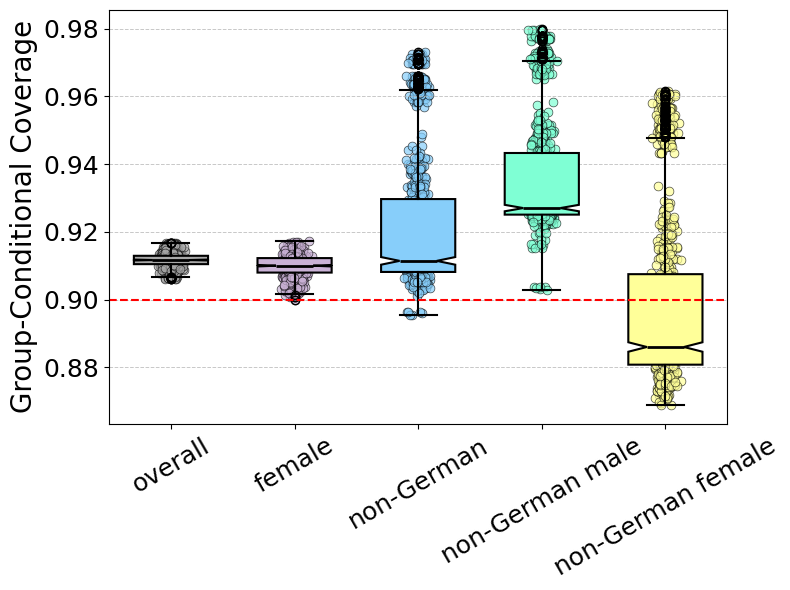

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# Positions for each box
positions = np.arange(1, len(cols) + 1)

# Draw the boxplots
bp = ax.boxplot(
    [df_sub[col] for col in cols],
    positions=positions,
    widths=0.6,
    patch_artist=True,
    notch=True
)

colors = ["darkgray", "#CAB2D6", "lightskyblue", "aquamarine", "#FFFF99",]

# Style the boxes and medians
for patch, median, color in zip(bp["boxes"], bp["medians"], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
    patch.set_linewidth(1.5)
    median.set_color("black")
    median.set_linewidth(2)

# Style whiskers and caps
for whisker in bp["whiskers"]:
    whisker.set_color("black")
    whisker.set_linewidth(1.5)
for cap in bp["caps"]:
    cap.set_color("black")
    cap.set_linewidth(1.5)

# Overlay the actual data points with a little horizontal jitter
for i, col in enumerate(cols):
    y = df_sub[col]
    x = np.random.normal(positions[i], 0.04, size=len(y))
    ax.scatter(
        x,
        y,
        alpha=0.7,
        color=colors[i],
        edgecolors="black",
        linewidths=0.5,
        s=40
    )

# Add a horizontal line at coverage = 0.90
ax.axhline(y=0.90, color='red', linestyle='--', linewidth=1.5, label='Target coverage = 0.90')
# Add a light grid
ax.yaxis.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

new_labels = [
    "overall",
    "female",
    "non-German",
    "non-German male",
    "non-German female"
]
ax.set_xticks(positions)
ax.set_xticklabels(new_labels, rotation=30)

ax.set_ylabel("Group-Conditional Coverage", fontsize=20)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.tight_layout()

output_path = CP_DIR / "coverage_subgroups.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

In [11]:
# Medians for subgroups
df_sub[cols].median().tolist()

[0.9116597926652548,
 0.9099878689850384,
 0.911413012968057,
 0.9270017112492119,
 0.8859910581222057]

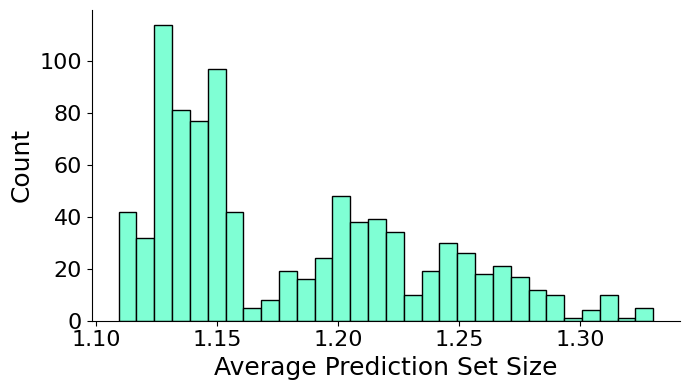

In [10]:
# Plot histogram
plt.figure(figsize=(7, 4))
plt.hist(df["avg_size"], bins=30, color='aquamarine', edgecolor='black')

plt.tick_params(axis='both', which='major', labelsize=16)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Average Prediction Set Size", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.grid(False)
plt.tight_layout()

output_path = CP_DIR / "avg_size_distribution.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
max_value = df["avg_size"].max()
min_value = df["avg_size"].min()

print("Max avg_size:", max_value)
print("Min avg_size:", min_value)